# Sign Language 

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)# Your Code Here
testing_images = np.expand_dims(testing_images, axis=3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1./255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1.0/255)
    # Your Code Here)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)# Your Code Here)


# Configure generators
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=10
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=10
)


# Train the Model
history = model.fit_generator(
    train_gen,
    epochs=20,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2746/2746 [==============================] - 15s 5ms/step - loss: 2.8506 - acc: 0.1430 - val_loss: 1.4324 - val_acc: 0.5008
Epoch 2/20
2746/2746 [==============================] - 14s 5ms/step - loss: 1.7437 - acc: 0.4387 - val_loss: 0.8968 - val_acc: 0.6757
Epoch 3/20
2746/2746 [==============================] - 14s 5ms/step - loss: 1.3297 - acc: 0.5593 - val_loss: 0.7375 - val_acc: 0.7322
Epoch 4/20
2746/2746 [==============================] - 14s 5ms/step - loss: 1.1102 - acc: 0.6351 - val_loss: 0.7148 - val_acc: 0.7401
Epoch 5/20
2746/2746 [==============================] - 15s 5ms/step - loss: 0.9536 - acc: 0.6797 - val_loss: 0.5278 - val_acc: 0.8179
Epoch 6/20
2746/2746 [==============================] - 15s 5ms/step - loss: 0.8481 - acc: 0.7190 - val_loss: 0.4722 - val_acc: 0.8288
Epoch 7/20
2746/2746 [==============================] - 15s 5ms/step - loss: 0.7830 - acc: 0.7380 - val_loss: 0.4174 - val_acc: 0.8366
Epoch 8/20
2746/2746 [==============================] -

[163.89015197753906, 0.7254601120948792]

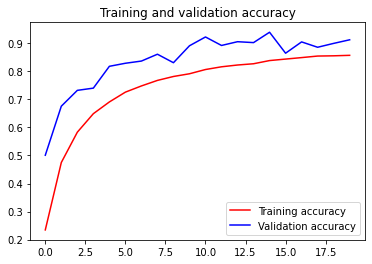

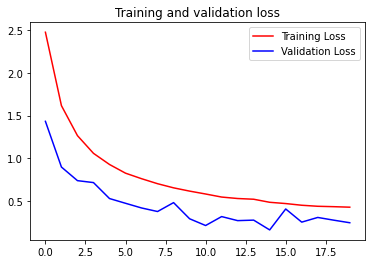

In [8]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']# Your Code Here
val_acc = history.history['val_acc']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()